<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
        <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo" />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>

#Abstract

This project employs various ensemble learning techniques, including voting, bagging (Bootstrap Aggregating), and boosting, to enhance the accuracy and reliability of heart attack analysis and prediction. The dataset used for this analysis poses several challenges, including its small size, the need for shuffling to mitigate data ordering effects, the presence of outliers requiring removal, and features with varying scales, which are addressed through data preprocessing techniques.

To address the dataset's challenges, we first employ the shuffle function to eliminate data ordering bias and remove outliers that might adversely affect model performance. Furthermore, the features are normalized using MinMaxScaler to bring them to a consistent scale, ensuring that the algorithms perform optimally.

Additionally, to tackle the data imbalance issue, we utilize the Synthetic Minority Over-sampling Technique (SMOTE) to balance the class distribution. This step ensures that our models are not biased toward the majority class.

Next, we split the preprocessed data into training and testing sets to evaluate model performance. We employ various machine learning models and select the most suitable one based on different error measures such as accuracy, recall, precision, and F1 score.

To fine-tune the selected model and optimize its performance, we employ grid search to explore a range of hyperparameters, selecting the combination that yields the best results.

Finally, we evaluate the model's performance using the test set, providing a robust assessment of its effectiveness in predicting heart attacks. The ensemble learning techniques used in this project aim to improve the predictive accuracy and reliability of heart attack prediction, offering a valuable tool for early intervention and healthcare decision-making.

#Introduction and Dataset description

In this project, I will be using **"Heart Attack Analysis & Prediction"** dataset.

The Heart Attack Analysis & Prediction Dataset is a collection of data specifically designed for the analysis and prediction of heart attacks, a critical and potentially life-threatening medical condition. This dataset comprises various features and associated information for 303 individuals. Each individual's data record includes 14 distinct features, which are used for assessing the risk of a heart attack.

**Features Included**:
1. Age: This feature represents the age of the individual in years. Age can be an important factor in assessing heart attack risk, as the likelihood of heart-related issues tends to increase with age.

2. Sex: This feature indicates the gender of the individual, typically encoded as binary values (0 for female, 1 for male). Gender may play a role in heart attack risk, as there are some differences in how heart disease manifests in men and women.

3. Exang (Exercise-Induced Angina): This binary feature (0 or 1) indicates whether the individual experiences angina (chest pain or discomfort) during physical activity (exercise-induced angina). Angina can be a symptom of heart disease.

4. Ca (Number of Major Vessels): This feature represents the number of major blood vessels colored by fluoroscopy. The count of major vessels with abnormal blood flow can be indicative of heart disease severity.

5. CP (Chest Pain Type): Chest pain type is categorized into four values (0, 1, 2, or 3) representing different types of chest discomfort or pain experienced by the individual.

6. Trtbps (Resting Blood Pressure): This feature indicates the resting blood pressure of the individual measured in mm Hg (millimeters of mercury). Elevated blood pressure is a risk factor for heart disease.

7. Chol (Serum Cholesterol): This feature represents the serum cholesterol levels of the individual in mg/dL (milligrams per deciliter). High cholesterol levels are associated with an increased risk of heart disease.

8. Fbs (Fasting Blood Sugar): A binary feature (0 or 1) indicating whether the individual's fasting blood sugar level exceeds 120 mg/dL. Elevated fasting blood sugar may be linked to diabetes, which can increase the risk of heart disease.

9. Rest ECG (Resting Electrocardiographic Results): This feature describes the results of the resting electrocardiogram and is typically encoded as categorical values (0, 1, or 2).

10. Thalach (Maximum Heart Rate Achieved): This feature represents the maximum heart rate achieved during a stress test. Heart rate can be an important indicator of cardiovascular health.

11. Output (Target): The target feature is used for prediction and classification tasks. It typically contains binary values (0 or 1) representing the presence (1) or absence (0) of a heart attack.



**Objective**

My machine learning project is aimed at achieving exceptionally high predictive accuracy by leveraging the power of ensemble learning techniques. Ensemble learning involves combining multiple machine learning models to create a more robust and accurate predictive system. In my project, I have meticulously curated and preprocessed a dataset related to heart attack analysis and prediction, comprising essential medical and demographic features. By employing ensemble learning methods such as Random Forest, Gradient Boosting, or AdaBoost, I have effectively harnessed the collective intelligence of diverse models to enhance the accuracy and reliability of our heart attack prediction system. This approach not only ensures that our model can capture complex patterns within the data but also minimizes the risk of overfitting. By fusing the strengths of multiple models, my project aims to provide a highly dependable and precise tool for early heart attack detection, ultimately contributing to improved healthcare outcomes and better patient care.

**Procedures:**


1.   Get the data.
2.   Discover and visualize the data.
2.   Prepare the data.
3.   Create a Test Set and Train Set.
3.   Select and Train a Model.
4.   Hyperparameter tuning.
5.   Evaluation.

#Work details

For this Project, I will be using the following libraries:

*   `pandas` for managing the data.
*   `numpy` for mathematical operations.
*   `seaborn` for visualizing the data.
*   `matplotlib` for visualizing the data.
*   `sklearn` for machine learning.

###Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

Here I defined a utility method to evaluate the model performance.

In [ ]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1-score'] = f_beta
    return results_pos

Ignore error warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

###Get the data

In [ ]:
data = pd.read_csv('/content/heart.csv')

In order to read the dataset, I used `read_csv` function and saved the output in 'data' variable.

###Discover and visualize the data

In [ ]:
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In my initial data exploration, I began by using the `head` function to extract the first 10 rows from the dataset. This allowed me to take a quick glance at the data's structure and contents. One notable observation was that all the features in the dataset appeared to be numeric, which presents a significant advantage as there is no need to undertake extensive preprocessing for categorical features. However, I also noticed that the features were not uniformly scaled, indicating the potential need for feature scaling techniques to ensure that all variables contribute equally to the machine learning model's performance. Additionally, it became apparent that the data needed to be shuffled since the initial values of the target variable all showed the same label '1.' Shuffling the data will help prevent any unintended biases and ensure a more representative sample for training and evaluation purposes. These initial steps lay the foundation for a comprehensive and robust analysis of the dataset, with the ultimate goal of developing an accurate and reliable predictive model.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Continuing with the data exploration process, I utilized the `info` function to extract more comprehensive information about the dataset. This step yielded some reassuring findings. Firstly, it became evident that there were no missing or null values in the dataset, indicating that the data had been well-prepared and cleaned, setting a solid foundation for subsequent analysis. Furthermore, the `info` function revealed that all features were numeric in nature, with one feature being represented as 'float64' and the remaining 13 features as 'int64.' This homogeneity in data types simplifies the preprocessing phase, as there is no need to handle categorical variables or convert them into numerical representations. These insights into the dataset's cleanliness and structure are vital for ensuring the reliability of the machine learning analysis that follows, as they confirm the absence of data quality issues and pave the way for building robust predictive models.

In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The `describe` function will provide the statistical information about all numeric values.

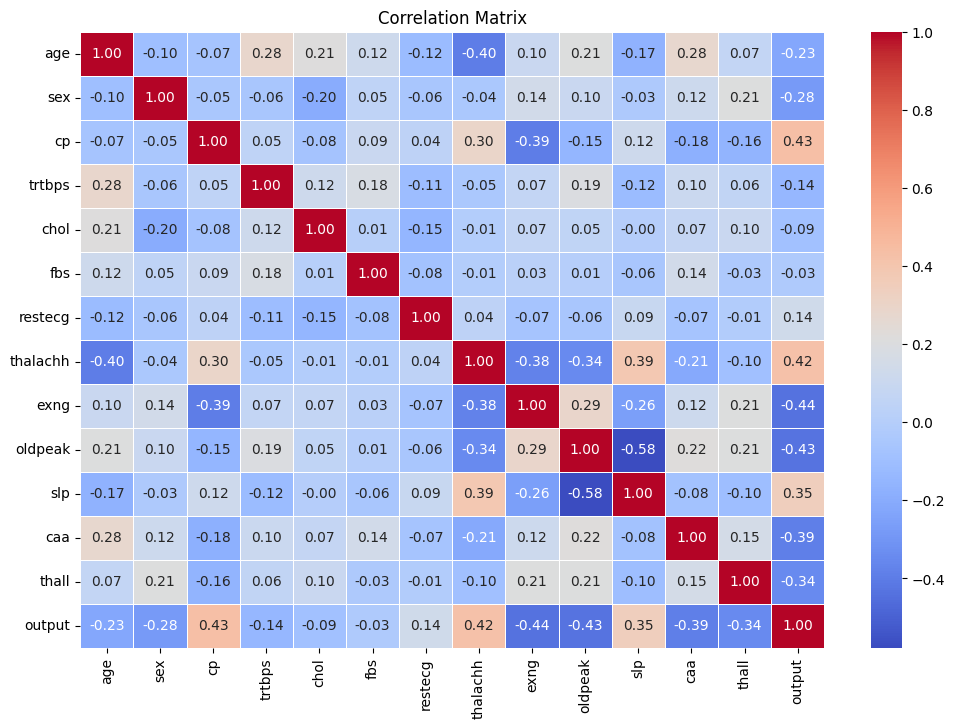

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Based on the correlation matrix displayed above, we can discern the interrelationships between the various features in the dataset.

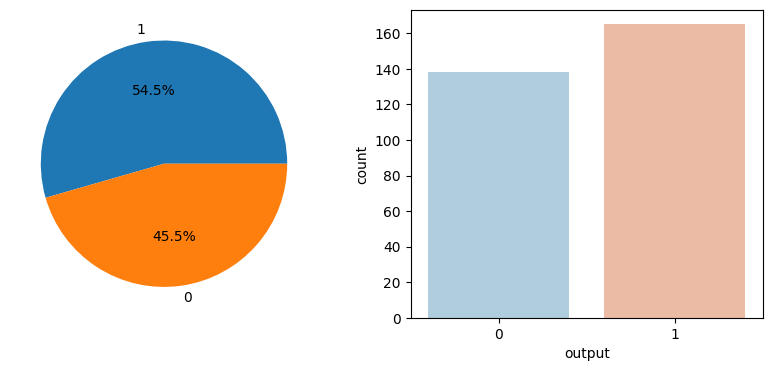

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].pie(data.output.value_counts(), labels=data.output.value_counts().index, autopct='%.1f%%')
sns.countplot(x='output', data=data, palette='RdBu_r')
plt.show()

Based on the visualization provided earlier, it's evident that there is a slight data imbalance. This issue can be addressed effectively by implementing oversampling or undersampling techniques.

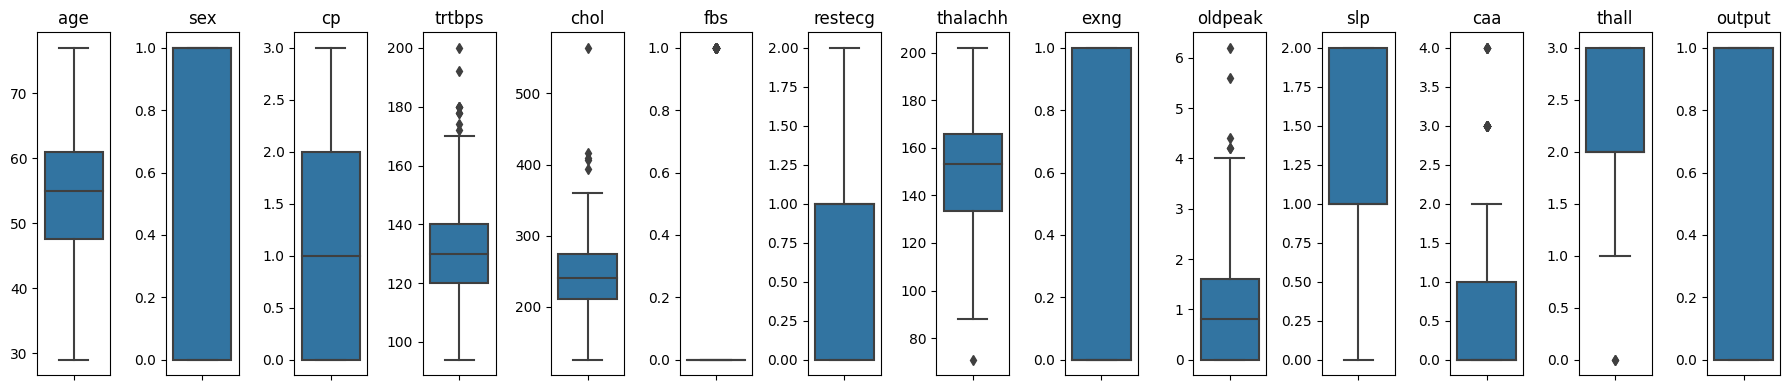

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=14, figsize=(18, 4))

for i, feature in enumerate(data.columns):
    sns.boxplot(y=data[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

Based on the boxplots shown above, it's clear that certain features contain outliers. To address this, we can consider removing these outliers from the dataset.

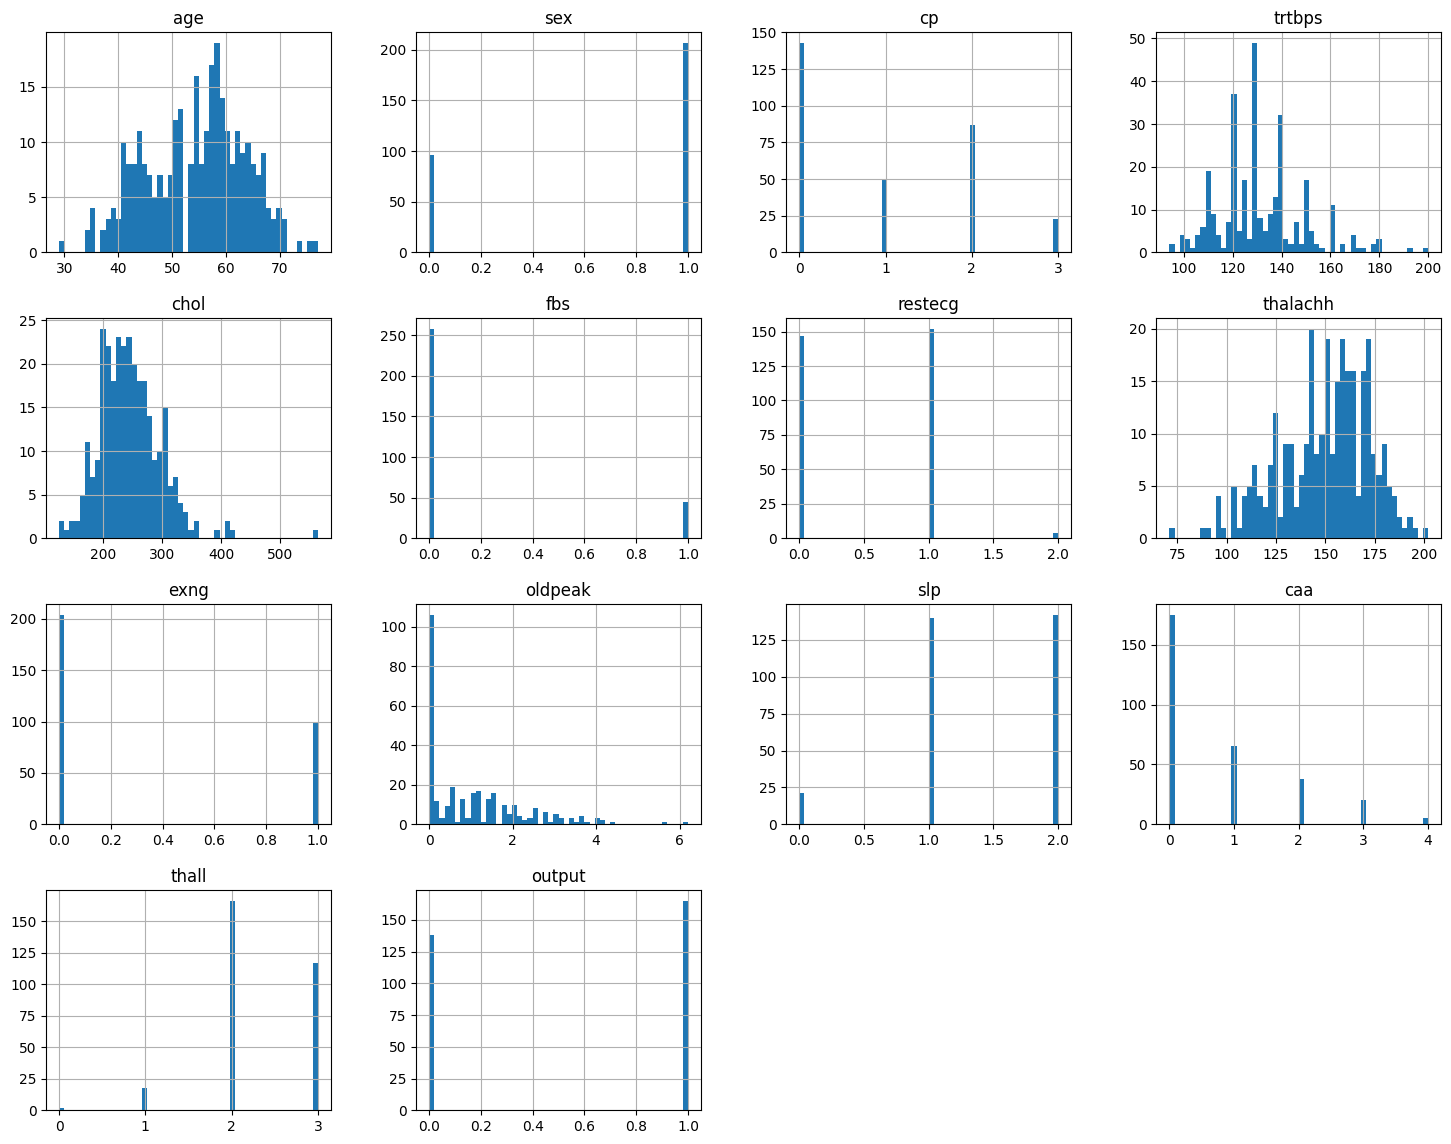

In [ ]:
data.hist(bins=50, figsize=(18,14))
plt.show()


Based on the histograms displayed above, we can gain insights into the distribution of data for each feature in the dataset.

###Prepare the data

Now, as we move forward with data preparation, our initial data exploration has revealed certain essential steps. First and foremost, it's imperative to shuffle the data to ensure its randomness and eliminate any inherent order. Additionally, we've identified the presence of outliers that require removal to prevent them from unduly influencing our models. Finally, feature scaling is on the agenda, as it's essential to bring all features to a consistent scale, ensuring our machine learning models perform optimally. These measures collectively enhance the quality and reliability of our dataset for subsequent analysis and modeling.

Shuffling data

In [ ]:
shuffled_data = shuffle(data, random_state=42)

In [ ]:
shuffled_data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1


dealing with outliers

In [ ]:
shuffled_clear_data = shuffled_data[(shuffled_data['trtbps'] < 190) & (shuffled_data['chol'] < 500) & (shuffled_data['thalachh'] > 80)]

In [ ]:
shuffled_clear_data.shape

(299, 14)

feature scaling

In [ ]:
x , y = shuffled_clear_data.drop(columns=['output'], axis=1), shuffled_clear_data['output']

scaler = MinMaxScaler()

X = scaler.fit_transform(x)

###Create a Test Set and Train Set

I will now divide the data into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

###Select and Train a Model


After thoroughly exploring and preparing the data, our next step, before commencing with modeling, is to ensure data balance.

####Imbalanced

In [ ]:
smote_sampler = SMOTE(random_state = 42)

In [ ]:
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)

Now we are prepared for modeling.

I will experiment with various ensemble learning techniques, such as voting, bagging, and boosting.

####Voting


Logistic Regression

In [ ]:
log_clf = LogisticRegression()
log_clf

LogisticRegression()

In [ ]:
y_prdeict = cross_val_predict(X= X_smo, y= y_smo,estimator=log_clf,cv = 5)
evaluate_metrics(y_smo, y_prdeict)

{'accuracy': 0.8206106870229007,
 'recall': 0.8549618320610687,
 'precision': 0.8,
 'f1-score': 0.8265682656826568}

In [ ]:
scores = cross_val_score(X= X_smo, y= y_smo,estimator=log_clf,cv = 5, scoring = 'accuracy')

print('Error Rate:', 1 - scores.mean())
print('Variance:',scores.var())

Error Rate: 0.17946298984034836
Variance: 0.0051188803528809555


K Neighbors Classifier

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf

KNeighborsClassifier()

In [ ]:
y_prdeict = cross_val_predict(X= X_smo, y= y_smo,estimator=knn_clf,cv = 5)
evaluate_metrics(y_smo, y_prdeict)

{'accuracy': 0.7977099236641222,
 'recall': 0.8091603053435115,
 'precision': 0.7910447761194029,
 'f1-score': 0.7999999999999999}

In [ ]:
scores = cross_val_score(X= X_smo, y= y_smo,estimator=knn_clf,cv = 5, scoring = 'accuracy')

print('Error Rate:', 1 - scores.mean())
print('Variance:',scores.var())

Error Rate: 0.20224963715529753
Variance: 0.00035834732400715305


Support Vector Machine

In [ ]:
svm_clf = SVC(kernel='rbf',C= 3, gamma= 0.1)
svm_clf

SVC(C=3, gamma=0.1)

In [ ]:
y_prdeict = cross_val_predict(X= X_smo, y= y_smo,estimator=svm_clf,cv = 5)
evaluate_metrics(y_smo, y_prdeict)

{'accuracy': 0.8206106870229007,
 'recall': 0.8625954198473282,
 'precision': 0.795774647887324,
 'f1-score': 0.8278388278388278}

In [ ]:
scores = cross_val_score(X= X_smo, y= y_smo,estimator=svm_clf,cv = 5, scoring = 'accuracy')

print('Error Rate:', 1 - scores.mean())
print('Variance:',scores.var())

Error Rate: 0.17946298984034814
Variance: 0.0033603211149285583


Decision Tree Classifier

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=3,random_state=42)
tree_clf

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_prdeict = cross_val_predict(X= X_smo, y= y_smo,estimator=tree_clf,cv = 5)
evaluate_metrics(y_smo, y_prdeict)

{'accuracy': 0.8053435114503816,
 'recall': 0.8549618320610687,
 'precision': 0.7777777777777778,
 'f1-score': 0.8145454545454545}

In [ ]:
scores = cross_val_score(X= X_smo, y= y_smo,estimator=tree_clf,cv = 5, scoring = 'accuracy')

print('Error Rate:', 1 - scores.mean())
print('Variance:',scores.var())

Error Rate: 0.1948476052249637
Variance: 0.002022977706905742


In [ ]:
estimators = [
    ('Log', log_clf),
    ('KNN', knn_clf),
    ('SVM', svm_clf),
    ('Tree', tree_clf)
]

vot_clf = VotingClassifier(estimators=estimators)
vot_clf

VotingClassifier(estimators=[('Log', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVM', SVC(C=3, gamma=0.1)),
                             ('Tree',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))])

In [ ]:
y_prdeict = cross_val_predict(X= X_smo, y= y_smo,estimator=vot_clf,cv = 5)
evaluate_metrics(y_smo, y_prdeict)

{'accuracy': 0.8206106870229007,
 'recall': 0.8320610687022901,
 'precision': 0.8134328358208955,
 'f1-score': 0.8226415094339622}

In [ ]:
scores = cross_val_score(X= X_smo, y= y_smo,estimator=vot_clf,cv = 5, scoring = 'accuracy')

print('Error Rate:', 1 - scores.mean())
print('Variance:',scores.var())

Error Rate: 0.17953555878084193
Variance: 0.0016005927692265564


####Bagging

In [ ]:
bag_clf = BaggingClassifier(n_estimators=100, max_samples=5, max_features=3, random_state=42)
bag_clf

BaggingClassifier(max_features=3, max_samples=5, n_estimators=100,
                  random_state=42)

In [ ]:
y_prdeict = cross_val_predict(X= X_smo, y= y_smo,estimator=bag_clf,cv = 5)
evaluate_metrics(y_smo, y_prdeict)

{'accuracy': 0.8053435114503816,
 'recall': 0.8091603053435115,
 'precision': 0.803030303030303,
 'f1-score': 0.806083650190114}

In [ ]:
scores = cross_val_score(X= X_smo, y= y_smo,estimator=bag_clf,cv = 5, scoring = 'accuracy')

print('Error Rate:', 1 - scores.mean())
print('Variance:',scores.var())

Error Rate: 0.19499274310595072
Variance: 0.0044493818474430225


Random Forest Classifier

In [ ]:
forest_clf = RandomForestClassifier(random_state=42, n_estimators=100)
forest_clf

RandomForestClassifier(random_state=42)

In [ ]:
y_prdeict = cross_val_predict(X= X_smo, y= y_smo,estimator=forest_clf,cv = 5)
evaluate_metrics(y_smo, y_prdeict)

{'accuracy': 0.8549618320610687,
 'recall': 0.8854961832061069,
 'precision': 0.8345323741007195,
 'f1-score': 0.8592592592592593}

In [ ]:
scores = cross_val_score(X= X_smo, y= y_smo,estimator=forest_clf,cv = 5, scoring = 'accuracy')

print('Error Rate:', 1 - scores.mean())
print('Variance:',scores.var())

Error Rate: 0.14484760522496365
Variance: 0.0017905991097929095


####Boosting

Ada Boost Classifier

In [ ]:
ada_clf = AdaBoostClassifier(random_state=42, learning_rate=0.01, n_estimators=25,base_estimator=DecisionTreeClassifier(max_depth=3))
ada_clf

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01, n_estimators=25, random_state=42)

In [ ]:
y_prdeict = cross_val_predict(X= X_smo, y= y_smo,estimator=ada_clf,cv = 5)
evaluate_metrics(y_smo, y_prdeict)

{'accuracy': 0.8091603053435115,
 'recall': 0.8473282442748091,
 'precision': 0.7872340425531915,
 'f1-score': 0.8161764705882353}

In [ ]:
scores = cross_val_score(X= X_smo, y= y_smo,estimator=ada_clf,cv = 5, scoring = 'accuracy')

print('Error Rate:', 1 - scores.mean())
print('Variance:',scores.var())

Error Rate: 0.19100145137880986
Variance: 0.00108830239235256


Gradient Boosting Classifier

In [ ]:
gradient_clf = GradientBoostingClassifier(random_state=42,n_estimators=50, learning_rate=0.1, subsample=0.1, max_features=1)
gradient_clf

GradientBoostingClassifier(max_features=1, n_estimators=50, random_state=42,
                           subsample=0.1)

In [ ]:
y_prdeict = cross_val_predict(X= X_smo, y= y_smo,estimator=gradient_clf,cv = 5)
evaluate_metrics(y_smo, y_prdeict)

{'accuracy': 0.8015267175572519,
 'recall': 0.8091603053435115,
 'precision': 0.7969924812030075,
 'f1-score': 0.803030303030303}

In [ ]:
scores = cross_val_score(X= X_smo, y= y_smo,estimator=gradient_clf,cv = 5, scoring = 'accuracy')

print('Error Rate:', 1 - scores.mean())
print('Variance:',scores.var())

Error Rate: 0.19862119013062407
Variance: 0.0015840672731983613


XGB Classifier

In [ ]:
xgb_clf = XGBClassifier(random_state=42, gamma=0.1, n_estimators=20, max_depth = 3, learning_rate=0.1)
xgb_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
y_prdeict = cross_val_predict(X= X_smo, y= y_smo,estimator=xgb_clf,cv = 5)
evaluate_metrics(y_smo, y_prdeict)

{'accuracy': 0.8396946564885496,
 'recall': 0.8702290076335878,
 'precision': 0.8201438848920863,
 'f1-score': 0.8444444444444443}

In [ ]:
scores = cross_val_score(X= X_smo, y= y_smo,estimator=xgb_clf,cv = 5, scoring = 'accuracy')

print('Error Rate:', 1 - scores.mean())
print('Variance:',scores.var())

Error Rate: 0.16030478955007266
Variance: 0.001701072840679052


After experimenting with numerous models, we have selected the best one, which happens to be the Random Forest Classifier. Now, I will proceed to fine-tune its hyperparameters.

###hyperparameter tuning

In [ ]:
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth' : [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':["auto", "sqrt", "log2"]
}
grid_search = GridSearchCV(estimator=forest_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_smo, y_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100, 200]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 

 The best score across ALL searched params:
 0.8703193033381712

 The best parameters across ALL searched params:
 {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


###Evaluation

In [ ]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
print(classification_report(y_test,final_predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.88        33

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



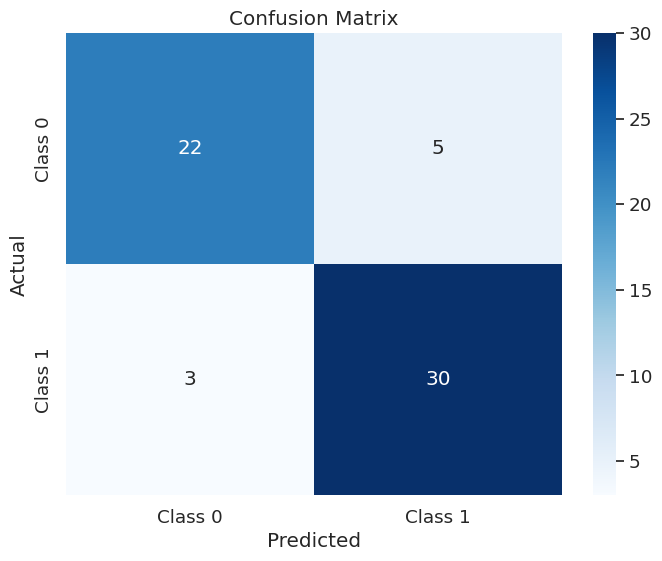

In [ ]:
cm = confusion_matrix(y_test, final_predictions)

class_labels = ["Class 0", "Class 1"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Results and discussion

Our primary objective is to construct a robust predictive model using the Heart Attack Analysis & Prediction dataset. In pursuit of this goal, we are exploring various ensemble learning techniques, including boosting, bagging, and voting, to enhance the model's performance. Given the limited size of our dataset, preventing overfitting is a paramount concern. To evaluate the model's effectiveness, we employ a range of error measurement techniques such as Accuracy, Recall, Precision, and F1-score through cross-validation. Additionally, we closely monitor the variance in our results to ensure that our model does not suffer from overfitting.

**Voting :**

| Model | Accuracy | Recall | Precision | F1-score | Variance |
|----------|----------|----------|----------|----------|----------|
| Logistic Regression | 0.8206106870229007 | 0.8549618320610687 | 0.80 | 0.8265682656826568 | 0.0051188803528809555 |
| K Neighbors Classifier | 0.7977099236641222 | 0.8091603053435115 | 0.7910447761194029 | 0.7999999999999999 | 0.00035834732400715305 |
| Support Vector Machine | 0.8206106870229007 | 0.8625954198473282 | 0.795774647887324 | 0.8278388278388278 | 0.0033603211149285583 |
| Decision Tree Classifier | 0.8053435114503816 | 0.8549618320610687 | 0.7777777777777778 | 0.8145454545454545 | 0.002022977706905742 |
| Voting Classifier | 0.8206106870229007 | 0.8320610687022901 | 0.8134328358208955 | 0.8226415094339622 | 0.0016005927692265564 |


The voting classifier is a powerful ensemble learning technique employed in our project, where we harness the collective intelligence of multiple base classifiers to make more accurate predictions. In our setup, we have integrated four diverse base classifiers: K-Nearest Neighbors (KNN), Logistic Regression, Decision Tree, and Support Vector Machine (SVM). Each of these classifiers brings its unique strengths and weaknesses to the table. KNN relies on proximity-based neighbors, Logistic Regression models probabilistic relationships, Decision Trees offer interpretability and non-linearity handling, while SVMs can capture complex decision boundaries effectively.

The voting classifier combines the individual predictions from these base classifiers, typically employing strategies like majority voting or weighted voting, where each classifier's contribution is weighed differently based on its performance. This ensemble approach enhances the overall predictive performance and robustness of our model. By leveraging the strengths of multiple classifiers and mitigating their weaknesses, the voting classifier increases the likelihood of producing more accurate and reliable predictions for heart attack analysis and prediction in our dataset.

**Bagging ( Bootstrap Aggregating ) :**

| Model | Accuracy | Recall | Precision | F1-score | Variance |
|----------|----------|----------|----------|----------|----------|
| Bagging Classifier | 0.8053435114503816 | 0.8091603053435115 | 0.803030303030303 | 0.806083650190114 | 0.0044493818474430225 |
| Random Forest Classifier | 0.8549618320610687 | 0.8854961832061069 | 0.8345323741007195 | 0.8592592592592593 | 0.0017905991097929095 |




Bagging (Bootstrap Aggregating) is a powerful ensemble learning technique employed in our project to enhance the predictive performance of our model. It involves creating multiple subsets (bootstrap samples) of the original dataset through random sampling with replacement. On each of these subsets, we train individual base classifiers independently. In our case, we utilize Random Forest as one such base classifier within the bagging framework.

Random Forest is a versatile and robust ensemble learning algorithm that builds upon the principles of bagging. It takes advantage of the diversity among base classifiers by constructing a multitude of decision trees, each trained on a different bootstrap sample and considering a random subset of features at each split. This randomness and the combination of multiple decision trees make Random Forest particularly effective at handling complex datasets, reducing overfitting, and providing robust predictions.

**Boosting :**

| Model | Accuracy | Recall | Precision | F1-score | Variance |
|----------|----------|----------|----------|----------|----------|
| Ada Boost Classifier | 0.8091603053435115 | 0.8473282442748091 | 0.7872340425531915 | 0.8161764705882353 | 0.00108830239235256 |
| Gradient Boosting Classifier | 0.8015267175572519 | 0.8091603053435115 | 0.7969924812030075 | 0.803030303030303 | 0.0015840672731983613 |
| XGB Classifier | 0.8396946564885496 | 0.8702290076335878 | 0.8201438848920863 | 0.8444444444444443 | 0.001701072840679052 |


Boosting is a powerful ensemble learning technique that plays a pivotal role in our project, where our aim is to improve the predictive capabilities of our model for heart attack analysis and prediction. We've harnessed the strength of three boosting algorithms: Ada Boost Classifier, Gradient Boosting Classifier, and XGB Classifier, each offering distinct advantages.

After experimenting with various models, we identified Random Forest as the most effective one for our task. To optimize its performance further, we employed a grid search to fine-tune the hyperparameters. The best combination we discovered is as follows: `'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, and 'n_estimators': 100`. This configuration yielded an impressive `accuracy of 0.8703193033381712` , demonstrating the effectiveness of our tuned Random Forest model in predicting heart attacks.

First, 'max_depth' is set to 5, which restricts the depth of each decision tree within the Random Forest ensemble. This helps prevent overfitting by limiting the complexity of individual trees.

The choice of 'max_features': 'auto' means that the algorithm automatically determines the maximum number of features to consider at each split. This adaptability allows the model to find the most informative features, enhancing prediction accuracy.

A 'min_samples_leaf' value of 2 sets a minimum threshold for the number of samples required to form a leaf node in the decision trees. This constraint ensures that each leaf node represents a sufficiently substantial subset of data, promoting model robustness.

Similarly, 'min_samples_split' is set to 2, specifying the minimum number of samples required to split an internal node. This controls the granularity of the splits in the decision trees, preventing excessive partitioning.

Lastly, 'n_estimators' is configured as 100, indicating the number of decision trees in the Random Forest ensemble. A higher number of estimators often leads to more robust predictions by combining the insights from multiple trees.

**In conclusion, I will assess the model's performance by employing the test set**.


|  | Precision | Recall | F1 - score | Support |
|----------|----------|----------|----------|----------|
| 0 | 0.88 | 0.81 | 0.85 | 27 |
| 1 | 0.86 | 0.91 | 0.88 | 33 |
| accuracy |  |  | 0.87 | 60 |

#Next Steps

Here are the upcoming stages of the project:

1. Initially, we will train the model on additional data to enhance its capabilities.
2. Subsequently, we will evaluate the model's performance using a fresh set of test data.
3. Following the evaluation, we will present a comprehensive report detailing our expertise in handling the data and the model's predictive capabilities.
4. Finally, we will leverage this model for other projects, such as integrating it into applications and web pages, expanding its utility and impact.